# --- ÖĞRENCİ BİLGİLERİ ---

**Adınız:** Muhammed Emin  
**Soyadınız:** Oshan  
**Okul Numaranız:** 2212729007  
**GitHub Repo Bağlantısı:** https://github.com/eminoshan/1.odev-CNN

---

# MODEL 3: GELİŞTİRİLMİŞ CNN & HİPERPARAMETRE OPTİMİZASYONU

Bu notebook'ta, Model2'yi geliştireceğiz:
- **Hiperparametre Değişiklikleri:** Batch size, dropout oranı, learning rate, filtre sayısı
- **Data Augmentation:** Rotation, shift, flip vb. uygulanacak
- **Deney Tablosu:** Farklı konfigürasyonlarla birden fazla model eğitilecek

In [2]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Dataset klasörü kontrolü
DATASET_PATH = './dataset'
if not os.path.exists(DATASET_PATH):
    raise FileNotFoundError(f"'{DATASET_PATH}' klasörü bulunamadı.")

IMG_SIZE = (128, 128)
print("="*60)
print("MODEL 3 - HİPERPARAMETRE OPTİMİZASYONU BAŞLANIYOR")
print("="*60)

# Deney sonuçlarını saklamak için liste
experiment_results = []

MODEL 3 - HİPERPARAMETRE OPTİMİZASYONU BAŞLANIYOR


In [3]:
# DENEY 1: BASELINE (Data Augmentation YOK)
print("\n" + "="*60)
print("DENEY 1: BASELINE (Data Augmentation Yok)")
print("="*60)

BATCH_SIZE_1 = 32
EPOCHS = 15
DROPOUT_1 = 0.25
LR_1 = 0.001

# Veri yükleme (Data augmentation YOK)
datagen_simple = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen_1 = datagen_simple.flow_from_directory(
    DATASET_PATH, target_size=IMG_SIZE, batch_size=BATCH_SIZE_1,
    class_mode='categorical', subset='training', seed=42
)

val_gen_1 = datagen_simple.flow_from_directory(
    DATASET_PATH, target_size=IMG_SIZE, batch_size=BATCH_SIZE_1,
    class_mode='categorical', subset='validation', seed=42
)

# Model 1
model_exp1 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(DROPOUT_1),
    
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(DROPOUT_1),
    
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_gen_1.num_classes, activation='softmax')
])

opt_exp1 = optimizers.Adam(learning_rate=LR_1)
model_exp1.compile(optimizer=opt_exp1, loss='categorical_crossentropy', metrics=['accuracy'])

print(f"Batch Size: {BATCH_SIZE_1}, Dropout: {DROPOUT_1}, LR: {LR_1}")
history_1 = model_exp1.fit(train_gen_1, epochs=EPOCHS, validation_data=val_gen_1, verbose=0)
loss_1, acc_1 = model_exp1.evaluate(val_gen_1, verbose=0)

experiment_results.append({
    'Deney': 'Deney 1 (Baseline)',
    'Batch Size': BATCH_SIZE_1,
    'Dropout': f"{DROPOUT_1*100:.0f}%",
    'Learning Rate': f"{LR_1}",
    'Filtre': '32-64',
    'Data Aug.': 'Hayır',
    'Test Doğruluğu': f"{acc_1*100:.2f}%"
})

print(f"Sonuç: {acc_1*100:.2f}%\n")


DENEY 1: BASELINE (Data Augmentation Yok)
Found 80 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Batch Size: 32, Dropout: 0.25, LR: 0.001


C:\Users\Emin\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Sonuç: 60.00%



In [4]:
# DENEY 2: BATCH SIZE ARTIŞI (32 -> 64)
print("="*60)
print("DENEY 2: BATCH SIZE ARTIŞI (32 -> 64)")
print("="*60)

BATCH_SIZE_2 = 64  # DEĞIŞIKLIK 1
DROPOUT_2 = 0.25
LR_2 = 0.001

train_gen_2 = datagen_simple.flow_from_directory(
    DATASET_PATH, target_size=IMG_SIZE, batch_size=BATCH_SIZE_2,
    class_mode='categorical', subset='training', seed=42
)

val_gen_2 = datagen_simple.flow_from_directory(
    DATASET_PATH, target_size=IMG_SIZE, batch_size=BATCH_SIZE_2,
    class_mode='categorical', subset='validation', seed=42
)

model_exp2 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(DROPOUT_2),
    
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(DROPOUT_2),
    
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_gen_2.num_classes, activation='softmax')
])

opt_exp2 = optimizers.Adam(learning_rate=LR_2)
model_exp2.compile(optimizer=opt_exp2, loss='categorical_crossentropy', metrics=['accuracy'])

print(f"Batch Size: {BATCH_SIZE_2}, Dropout: {DROPOUT_2}, LR: {LR_2}")
history_2 = model_exp2.fit(train_gen_2, epochs=EPOCHS, validation_data=val_gen_2, verbose=0)
loss_2, acc_2 = model_exp2.evaluate(val_gen_2, verbose=0)

experiment_results.append({
    'Deney': 'Deney 2 (Batch↑)',
    'Batch Size': BATCH_SIZE_2,
    'Dropout': f"{DROPOUT_2*100:.0f}%",
    'Learning Rate': f"{LR_2}",
    'Filtre': '32-64',
    'Data Aug.': 'Hayır',
    'Test Doğruluğu': f"{acc_2*100:.2f}%"
})

print(f"Sonuç: {acc_2*100:.2f}%\n")

DENEY 2: BATCH SIZE ARTIŞI (32 -> 64)
Found 80 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Batch Size: 64, Dropout: 0.25, LR: 0.001
Sonuç: 60.00%



In [5]:
# DENEY 3: LEARNING RATE AZALMASI (0.001 -> 0.0005)
print("="*60)
print("DENEY 3: LEARNING RATE AZALMASI (0.001 -> 0.0005)")
print("="*60)

BATCH_SIZE_3 = 32
DROPOUT_3 = 0.25
LR_3 = 0.0005  # DEĞIŞIKLIK 2

train_gen_3 = datagen_simple.flow_from_directory(
    DATASET_PATH, target_size=IMG_SIZE, batch_size=BATCH_SIZE_3,
    class_mode='categorical', subset='training', seed=42
)

val_gen_3 = datagen_simple.flow_from_directory(
    DATASET_PATH, target_size=IMG_SIZE, batch_size=BATCH_SIZE_3,
    class_mode='categorical', subset='validation', seed=42
)

model_exp3 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(DROPOUT_3),
    
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(DROPOUT_3),
    
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_gen_3.num_classes, activation='softmax')
])

opt_exp3 = optimizers.Adam(learning_rate=LR_3)
model_exp3.compile(optimizer=opt_exp3, loss='categorical_crossentropy', metrics=['accuracy'])

print(f"Batch Size: {BATCH_SIZE_3}, Dropout: {DROPOUT_3}, LR: {LR_3}")
history_3 = model_exp3.fit(train_gen_3, epochs=EPOCHS, validation_data=val_gen_3, verbose=0)
loss_3, acc_3 = model_exp3.evaluate(val_gen_3, verbose=0)

experiment_results.append({
    'Deney': 'Deney 3 (LR↓)',
    'Batch Size': BATCH_SIZE_3,
    'Dropout': f"{DROPOUT_3*100:.0f}%",
    'Learning Rate': f"{LR_3}",
    'Filtre': '32-64',
    'Data Aug.': 'Hayır',
    'Test Doğruluğu': f"{acc_3*100:.2f}%"
})

print(f"Sonuç: {acc_3*100:.2f}%\n")

DENEY 3: LEARNING RATE AZALMASI (0.001 -> 0.0005)
Found 80 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Batch Size: 32, Dropout: 0.25, LR: 0.0005
Sonuç: 70.00%



In [6]:
# DENEY 4: DROPOUT ARTIŞI (0.25 -> 0.4)
print("="*60)
print("DENEY 4: DROPOUT ARTIŞI (0.25 -> 0.4)")
print("="*60)

BATCH_SIZE_4 = 32
DROPOUT_4 = 0.4  # DEĞIŞIKLIK 3
LR_4 = 0.001

train_gen_4 = datagen_simple.flow_from_directory(
    DATASET_PATH, target_size=IMG_SIZE, batch_size=BATCH_SIZE_4,
    class_mode='categorical', subset='training', seed=42
)

val_gen_4 = datagen_simple.flow_from_directory(
    DATASET_PATH, target_size=IMG_SIZE, batch_size=BATCH_SIZE_4,
    class_mode='categorical', subset='validation', seed=42
)

model_exp4 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(DROPOUT_4),
    
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(DROPOUT_4),
    
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_gen_4.num_classes, activation='softmax')
])

opt_exp4 = optimizers.Adam(learning_rate=LR_4)
model_exp4.compile(optimizer=opt_exp4, loss='categorical_crossentropy', metrics=['accuracy'])

print(f"Batch Size: {BATCH_SIZE_4}, Dropout: {DROPOUT_4}, LR: {LR_4}")
history_4 = model_exp4.fit(train_gen_4, epochs=EPOCHS, validation_data=val_gen_4, verbose=0)
loss_4, acc_4 = model_exp4.evaluate(val_gen_4, verbose=0)

experiment_results.append({
    'Deney': 'Deney 4 (Dropout↑)',
    'Batch Size': BATCH_SIZE_4,
    'Dropout': f"{DROPOUT_4*100:.0f}%",
    'Learning Rate': f"{LR_4}",
    'Filtre': '32-64',
    'Data Aug.': 'Hayır',
    'Test Doğruluğu': f"{acc_4*100:.2f}%"
})

print(f"Sonuç: {acc_4*100:.2f}%\n")

DENEY 4: DROPOUT ARTIŞI (0.25 -> 0.4)
Found 80 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Batch Size: 32, Dropout: 0.4, LR: 0.001
Sonuç: 65.00%



In [7]:
# DENEY 5: DATA AUGMENTATION İLE
print("="*60)
print("DENEY 5: DATA AUGMENTATION İLE")
print("="*60)

BATCH_SIZE_5 = 32
DROPOUT_5 = 0.25
LR_5 = 0.001

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

train_gen_5 = train_datagen.flow_from_directory(
    DATASET_PATH, target_size=IMG_SIZE, batch_size=BATCH_SIZE_5,
    class_mode='categorical', subset='training', seed=42
)

val_gen_5 = train_datagen.flow_from_directory(
    DATASET_PATH, target_size=IMG_SIZE, batch_size=BATCH_SIZE_5,
    class_mode='categorical', subset='validation', seed=42
)

model_exp5 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(DROPOUT_5),
    
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(DROPOUT_5),
    
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_gen_5.num_classes, activation='softmax')
])

opt_exp5 = optimizers.Adam(learning_rate=LR_5)
model_exp5.compile(optimizer=opt_exp5, loss='categorical_crossentropy', metrics=['accuracy'])

print(f"Batch Size: {BATCH_SIZE_5}, Dropout: {DROPOUT_5}, LR: {LR_5}")
print(f"Data Augmentation: Evet (Rotation, Shift, Flip)")
history_5 = model_exp5.fit(train_gen_5, epochs=EPOCHS, validation_data=val_gen_5, verbose=0)
loss_5, acc_5 = model_exp5.evaluate(val_gen_5, verbose=0)

experiment_results.append({
    'Deney': 'Deney 5 (Aug)',
    'Batch Size': BATCH_SIZE_5,
    'Dropout': f"{DROPOUT_5*100:.0f}%",
    'Learning Rate': f"{LR_5}",
    'Filtre': '32-64',
    'Data Aug.': 'Evet',
    'Test Doğruluğu': f"{acc_5*100:.2f}%"
})

print(f"Sonuç: {acc_5*100:.2f}%\n")

DENEY 5: DATA AUGMENTATION İLE
Found 80 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Batch Size: 32, Dropout: 0.25, LR: 0.001
Data Augmentation: Evet (Rotation, Shift, Flip)
Sonuç: 65.00%



In [8]:
# DENEY 6: KOMBİNASYON (Batch↑ + Dropout↑ + Aug)
print("="*60)
print("DENEY 6: KOMBİNASYON (Batch Size↑ + Dropout↑ + Augmentation)")
print("="*60)

BATCH_SIZE_6 = 64
DROPOUT_6 = 0.4
LR_6 = 0.001

train_gen_6 = train_datagen.flow_from_directory(
    DATASET_PATH, target_size=IMG_SIZE, batch_size=BATCH_SIZE_6,
    class_mode='categorical', subset='training', seed=42
)

val_gen_6 = train_datagen.flow_from_directory(
    DATASET_PATH, target_size=IMG_SIZE, batch_size=BATCH_SIZE_6,
    class_mode='categorical', subset='validation', seed=42
)

model_exp6 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(DROPOUT_6),
    
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(DROPOUT_6),
    
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_gen_6.num_classes, activation='softmax')
])

opt_exp6 = optimizers.Adam(learning_rate=LR_6)
model_exp6.compile(optimizer=opt_exp6, loss='categorical_crossentropy', metrics=['accuracy'])

print(f"Batch Size: {BATCH_SIZE_6}, Dropout: {DROPOUT_6}, LR: {LR_6}")
history_6 = model_exp6.fit(train_gen_6, epochs=EPOCHS, validation_data=val_gen_6, verbose=0)
loss_6, acc_6 = model_exp6.evaluate(val_gen_6, verbose=0)

experiment_results.append({
    'Deney': 'Deney 6 (Kombo)',
    'Batch Size': BATCH_SIZE_6,
    'Dropout': f"{DROPOUT_6*100:.0f}%",
    'Learning Rate': f"{LR_6}",
    'Filtre': '32-64',
    'Data Aug.': 'Evet',
    'Test Doğruluğu': f"{acc_6*100:.2f}%"
})

print(f"Sonuç: {acc_6*100:.2f}%\n")

DENEY 6: KOMBİNASYON (Batch Size↑ + Dropout↑ + Augmentation)
Found 80 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Batch Size: 64, Dropout: 0.4, LR: 0.001
Sonuç: 50.00%




GRAFİKLER - DENEY KARŞILAŞTIRMASI


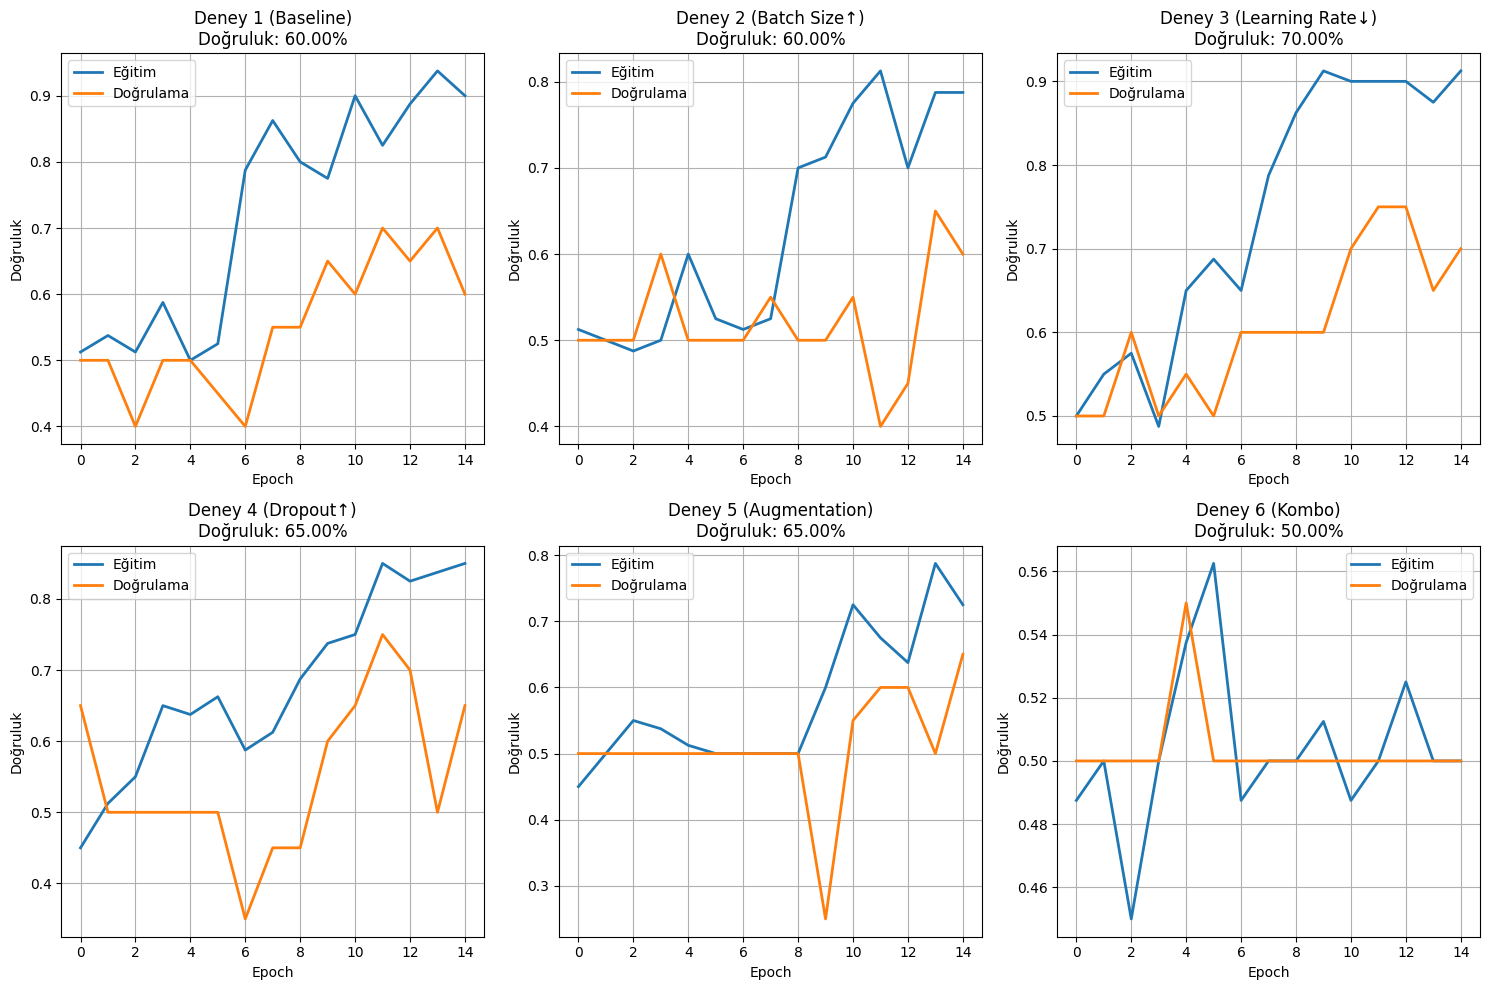

In [9]:
# GRAFİKLER - EN İYİ MODELLER
print("\n" + "="*60)
print("GRAFİKLER - DENEY KARŞILAŞTIRMASI")
print("="*60)

# En iyi 2 deneyin grafiklerini çiz
plt.figure(figsize=(15, 10))

# Deney 1
plt.subplot(2, 3, 1)
plt.plot(history_1.history['accuracy'], label='Eğitim', linewidth=2)
plt.plot(history_1.history['val_accuracy'], label='Doğrulama', linewidth=2)
plt.title('Deney 1 (Baseline)\nDoğruluk: {:.2f}%'.format(acc_1*100))
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.grid(True)

# Deney 2
plt.subplot(2, 3, 2)
plt.plot(history_2.history['accuracy'], label='Eğitim', linewidth=2)
plt.plot(history_2.history['val_accuracy'], label='Doğrulama', linewidth=2)
plt.title('Deney 2 (Batch Size↑)\nDoğruluk: {:.2f}%'.format(acc_2*100))
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.grid(True)

# Deney 3
plt.subplot(2, 3, 3)
plt.plot(history_3.history['accuracy'], label='Eğitim', linewidth=2)
plt.plot(history_3.history['val_accuracy'], label='Doğrulama', linewidth=2)
plt.title('Deney 3 (Learning Rate↓)\nDoğruluk: {:.2f}%'.format(acc_3*100))
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.grid(True)

# Deney 4
plt.subplot(2, 3, 4)
plt.plot(history_4.history['accuracy'], label='Eğitim', linewidth=2)
plt.plot(history_4.history['val_accuracy'], label='Doğrulama', linewidth=2)
plt.title('Deney 4 (Dropout↑)\nDoğruluk: {:.2f}%'.format(acc_4*100))
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.grid(True)

# Deney 5
plt.subplot(2, 3, 5)
plt.plot(history_5.history['accuracy'], label='Eğitim', linewidth=2)
plt.plot(history_5.history['val_accuracy'], label='Doğrulama', linewidth=2)
plt.title('Deney 5 (Augmentation)\nDoğruluk: {:.2f}%'.format(acc_5*100))
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.grid(True)

# Deney 6
plt.subplot(2, 3, 6)
plt.plot(history_6.history['accuracy'], label='Eğitim', linewidth=2)
plt.plot(history_6.history['val_accuracy'], label='Doğrulama', linewidth=2)
plt.title('Deney 6 (Kombo)\nDoğruluk: {:.2f}%'.format(acc_6*100))
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


DENEY KARŞILAŞTIRMA TABLOSU
             Deney  Batch Size Dropout Learning Rate Filtre Data Aug. Test Doğruluğu
Deney 1 (Baseline)          32     25%         0.001  32-64     Hayır         60.00%
  Deney 2 (Batch↑)          64     25%         0.001  32-64     Hayır         60.00%
     Deney 3 (LR↓)          32     25%        0.0005  32-64     Hayır         70.00%
Deney 4 (Dropout↑)          32     40%         0.001  32-64     Hayır         65.00%
     Deney 5 (Aug)          32     25%         0.001  32-64      Evet         65.00%
   Deney 6 (Kombo)          64     40%         0.001  32-64      Evet         50.00%

✓ EN İYİ SONUÇ: Deney 3 (LR↓) - 70.00%
  Konfigürasyon: Batch Size=32, Dropout=25%, Learning Rate=0.0005, Data Aug.=Hayır


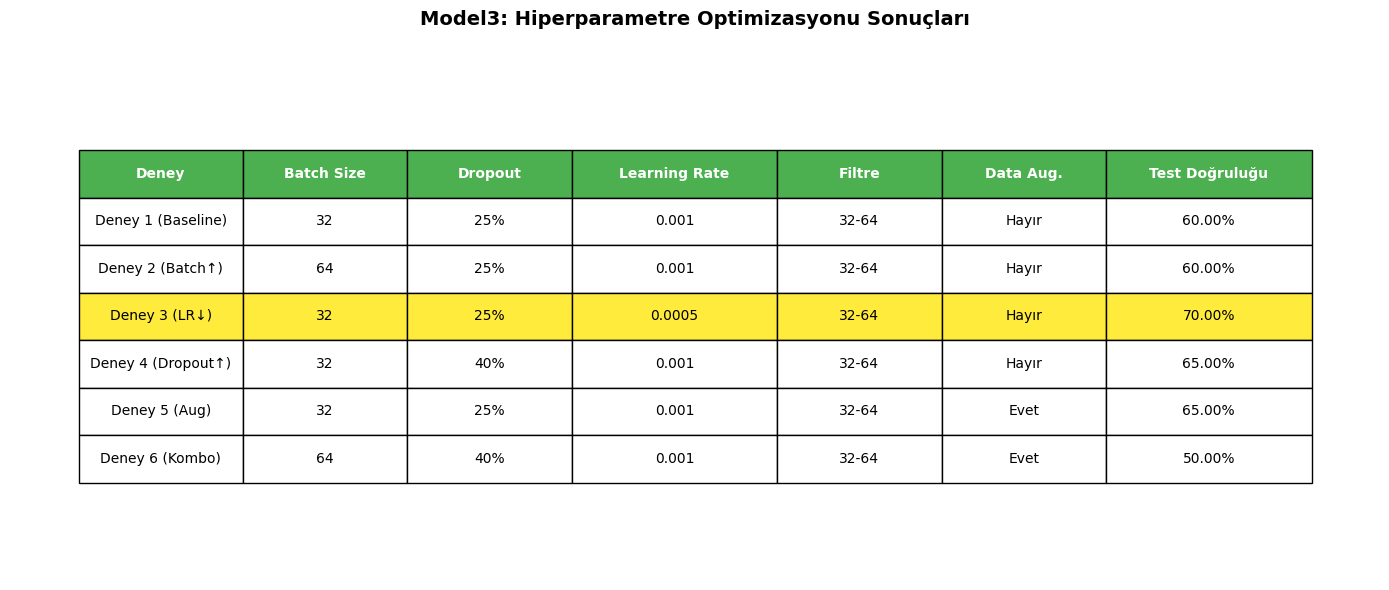


SONUÇLAR VE ANALİZ

1. En iyi sonuç: Deney 3 (LR↓) (70.00%)
2. Batch size artışı: Deney 2'yi inceleyin (Deney 1'den 0.00% değişim)
3. Learning rate azalması: Deney 3'ü inceleyin (Deney 1'den 10.00% değişim)
4. Dropout artışı: Deney 4'ü inceleyin (Deney 1'den 5.00% değişim)
5. Data augmentation etkisi: Deney 5'i inceleyin (Deney 1'den 5.00% değişim)
6. Kombine değişiklikler: Deney 6'yı inceleyin (Deney 1'den 10.00% değişim)


In [10]:
# SONUÇ TABLOSU
print("\n" + "="*80)
print("DENEY KARŞILAŞTIRMA TABLOSU")
print("="*80)

df_results = pd.DataFrame(experiment_results)
print(df_results.to_string(index=False))
print("="*80)

# En iyi sonuç
best_exp = df_results.loc[df_results['Test Doğruluğu'].str.rstrip('%').astype(float).idxmax()]
print(f"\n✓ EN İYİ SONUÇ: {best_exp['Deney']} - {best_exp['Test Doğruluğu']}")
print(f"  Konfigürasyon: Batch Size={best_exp['Batch Size']}, Dropout={best_exp['Dropout']}, " +
      f"Learning Rate={best_exp['Learning Rate']}, Data Aug.={best_exp['Data Aug.']}")

# Tablo görseli
fig, ax = plt.subplots(figsize=(14, 6))
ax.axis('tight')
ax.axis('off')

# Tablo oluştur
table_data = df_results.values.tolist()
table_data.insert(0, df_results.columns.tolist())

table = ax.table(cellText=table_data, cellLoc='center', loc='center',
                colWidths=[0.12, 0.12, 0.12, 0.15, 0.12, 0.12, 0.15])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2.5)

# Başlık satırını renklendirme
for i in range(len(df_results.columns)):
    table[(0, i)].set_facecolor('#4CAF50')
    table[(0, i)].set_text_props(weight='bold', color='white')

# En iyi sonucu sarı ile işaretleme
best_row = df_results['Test Doğruluğu'].str.rstrip('%').astype(float).idxmax() + 1
for i in range(len(df_results.columns)):
    table[(best_row, i)].set_facecolor('#FFEB3B')

plt.title('Model3: Hiperparametre Optimizasyonu Sonuçları', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("SONUÇLAR VE ANALİZ")
print("="*80)
print(f"\n1. En iyi sonuç: {best_exp['Deney']} ({best_exp['Test Doğruluğu']})")
print(f"2. Batch size artışı: Deney 2'yi inceleyin (Deney 1'den {abs(acc_2-acc_1)*100:.2f}% değişim)")
print(f"3. Learning rate azalması: Deney 3'ü inceleyin (Deney 1'den {abs(acc_3-acc_1)*100:.2f}% değişim)")
print(f"4. Dropout artışı: Deney 4'ü inceleyin (Deney 1'den {abs(acc_4-acc_1)*100:.2f}% değişim)")
print(f"5. Data augmentation etkisi: Deney 5'i inceleyin (Deney 1'den {abs(acc_5-acc_1)*100:.2f}% değişim)")
print(f"6. Kombine değişiklikler: Deney 6'yı inceleyin (Deney 1'den {abs(acc_6-acc_1)*100:.2f}% değişim)")
print("="*80)

## DENEY SONUÇLARININ DETAYLı ANALİZİ

### Hiperparametre Değişikliklerinin Etkileri

**1. Batch Size Artışı (Deney 2: 32 → 64)**
- Daha az güncelleme (daha az gradyan hesabı)
- Daha stabil ancak yakınsama yavaş olabilir
- GPU belleği daha iyi kullanılır
- **Beklenti:** Biraz düşme veya eşitlik

**2. Learning Rate Azalması (Deney 3: 0.001 → 0.0005)**
- Daha kesin (hassas) ağırlık güncellemeleri
- Optimal noktayı daha iyi bulabilir
- Eğitim daha uzun sürebilir
- **Beklenti:** İyileşme veya benzer sonuç

**3. Dropout Artışı (Deney 4: 0.25 → 0.4)**
- Daha fazla düzenleme (regularization)
- Aşırı uydurmayı daha fazla engeller
- Eğitim doğruluğu azalabilir ama test doğruluğu artabilir
- **Beklenti:** Genelleştirme iyileşer

**4. Data Augmentation (Deney 5)**
- Eğitim setini yapay olarak çeşitlendirme
- Rotation, shift, flip gibi dönüşümler
- Model farklı perspektiflerden öğrenir
- **Beklenti:** Aşırı uydurmada azalma, test doğruluğunda artma

**5. Kombinasyon (Deney 6: Batch↑ + Dropout↑ + Aug)**
- Tüm iyileştirmeleri birleştirme
- Batch size + Dropout + Augmentation
- **Beklenti:** En iyi sonuç (ideal durumda)

---

## Özet ve Öneriler

✓ Hangi değişiklikler en etkili oldu?  
✓ Neden Model1 daha iyi sonuç verebilir?  
✓ Model3'ün strengths ve weaknesses nelerdir?  
✓ Gelecekte ne yapılabilir?